In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('Housing.csv')
X = np.array(data[['area','bedrooms','bathrooms', 'stories']].values) # Data with 4 features
y = data['price'].values # Actual Price

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

w = np.zeros(X.shape[1]) # Weights initially set to 0
b = 0 # Bias initially set to 0
lr = 0.001 # Learning rate (Had to mess around with to get a better result)
n = X.shape[0] # Number of samples
losses = [] # To calculate loss

In [5]:
def fit(X, w, y, b, lr, n):
    for i in range(10000): # Number of iterations (also had to mess around with this)
        y_pred = np.dot(X,w) + b

        dw = (1/n) * np.dot(X.T, (y_pred - y))
        db = (1/n) * np.sum(y_pred - y)
        w = w - lr * dw
        b = b - lr * db

        loss = (1/n) * np.sum((y_pred - y)**2)
        losses.append(loss)  # Save loss for plotting
        
    return w, b

In [6]:
w, b = fit(X, w, y, b, lr, n)

In [7]:
y_pred = np.dot(X,w)+b
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)
r2 = r2_score(y, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 1621757315917.6426
R2 Score: 0.5355958586744347


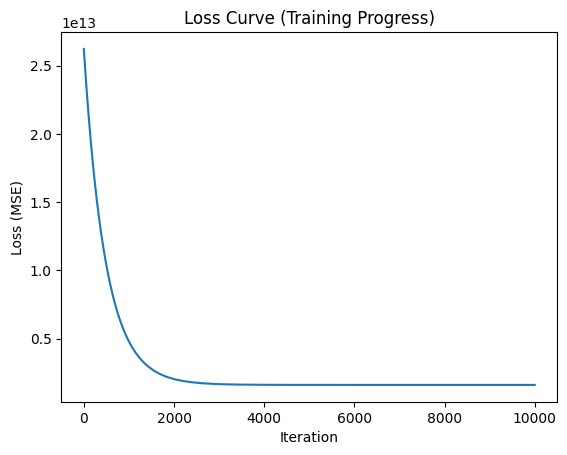

In [8]:
# Plot the loss over iterations
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve (Training Progress)')
plt.show()

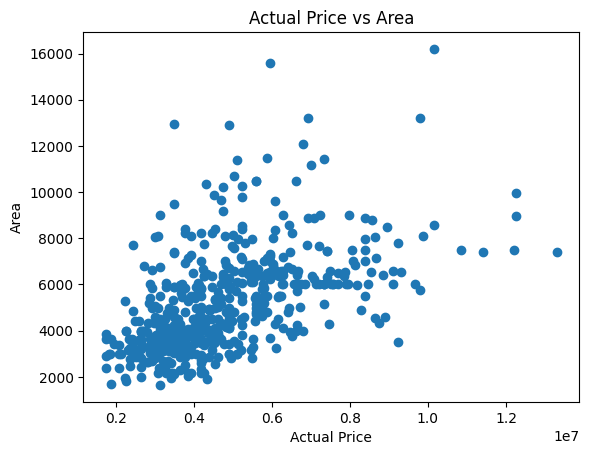

In [9]:
plt.scatter(y, data['area'])
plt.xlabel('Actual Price')
plt.ylabel('Area')
plt.title('Actual Price vs Area')
plt.show()